In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [0]:
img_width, img_height = 224, 224 # we set the img_width and img_height according to the pretrained models we are
# going to use. The input size for ResNet-50 is 224 by 224 by 3.

train_data_dir = '/content/drive/My Drive/india_new_currency/train'
validation_data_dir = '/content/drive/My Drive/india_new_currency/test'
nb_train_samples = 1400
nb_validation_samples = 350
batch_size = 16

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1449 images belonging to 8 classes.
Found 384 images belonging to 8 classes.


In [5]:
#import inception with pre-trained weights. do not include fully #connected layers
inception_base = applications.ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(8, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

W0625 16:49:06.936312 140152291051392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 16:49:06.992190 140152291051392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 16:49:07.003404 140152291051392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0625 16:49:07.048676 140152291051392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0625 16:49:07.050228

94658560/94653016 [==============================] - 4s 0us/step


In [6]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

W0625 16:49:25.329909 140152291051392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16258152297906637760
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10178915818468008949
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1121976904680659186
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12868449754377465013
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [8]:
callbacks = [ModelCheckpoint('imagenet', monitor='val_acc', save_best_only=True)]

history = inception_transfer.fit_generator( train_generator, callbacks = callbacks, samples_per_epoch=nb_train_samples, 
                              nb_epoch=25, validation_data=validation_generator, nb_val_samples=nb_validation_samples)

print('Training Completed!')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=<keras_pre..., steps_per_epoch=87, epochs=25, validation_steps=350)`
  after removing the cwd from sys.path.
W0625 16:49:59.017254 140152291051392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrap

Epoch 1/25
87/87 [==============================] - 747s 9s/step - loss: 1.7685 - acc: 0.2787 - val_loss: 1.8128 - val_acc: 0.2068
Epoch 2/25
87/87 [==============================] - 279s 3s/step - loss: 1.3287 - acc: 0.5065 - val_loss: 1.6394 - val_acc: 0.2896
Epoch 3/25
87/87 [==============================] - 280s 3s/step - loss: 1.0784 - acc: 0.6418 - val_loss: 1.4506 - val_acc: 0.3600
Epoch 4/25
87/87 [==============================] - 281s 3s/step - loss: 0.8597 - acc: 0.7546 - val_loss: 1.2775 - val_acc: 0.4639
Epoch 5/25
87/87 [==============================] - 279s 3s/step - loss: 0.6937 - acc: 0.7977 - val_loss: 1.0960 - val_acc: 0.5477
Epoch 6/25
87/87 [==============================] - 280s 3s/step - loss: 0.5298 - acc: 0.8586 - val_loss: 0.9808 - val_acc: 0.5900
Epoch 7/25
87/87 [==============================] - 276s 3s/step - loss: 0.4661 - acc: 0.8725 - val_loss: 0.8928 - val_acc: 0.6414
Epoch 8/25
87/87 [==============================] - 261s 3s/step - loss: 0.3702 - a

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


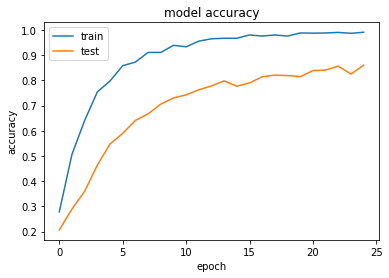

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

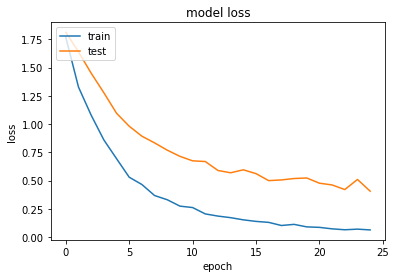

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import load_model

inception_transfer.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del inception_transfer  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')